Sources: https://arxiv.org/pdf/1603.07678.pdf

# Principles of Operation
* qubits stored in individual ions (171 Yb+)
* Ion suspended in free space through EM fields, forming a line in unconstrained dimension
*  Lasers used to initialize state of system to simple state through optical pumping
  * __Optical Pumping__ - light is used to raise or "pump" electrons from lower energy level in atom or molecule to higher one
* Lasers also used to read out state, using fluorescence
  * apply a laster that only couples to one of two qubit states, emitting stream of photons
* Single + two-qubit gates implemented through laser-drive stimulated Raman transitions
* R and two-qubit XX interaction, form universal gates

In [1]:
from npquantum import *
from qiskit.visualization import plot_bloch_multivector

In [2]:
## Gates realizable in Ion Trapped Systems
# R(theta, phi)
# Rx, Ry, Rz
# Ry = R(theta, pi/2)
# Rx = R(theta, 0)

## Rx and R identity

In [3]:
# Rx = R(theta, 0)

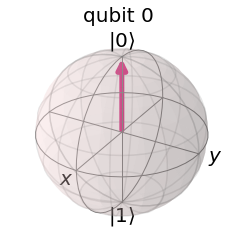

In [4]:
plot_bloch_multivector(to_qiskit_plot(ket0))

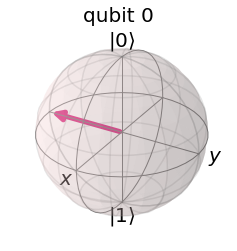

In [5]:
plot_bloch_multivector(to_qiskit_plot(Rx(np.pi/2) * ket0))

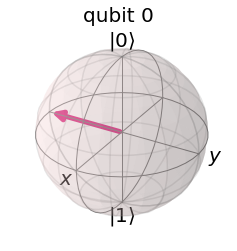

In [6]:
plot_bloch_multivector(to_qiskit_plot(IonTrap.R(np.pi/2, 0) * ket0))

## Ry and R identity

In [7]:
# Ry = R(theta, pi/2)

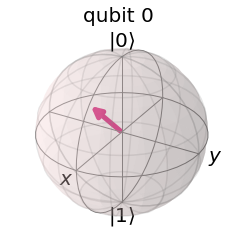

In [8]:
plot_bloch_multivector(to_qiskit_plot(Ry(np.pi/4) * ket0))

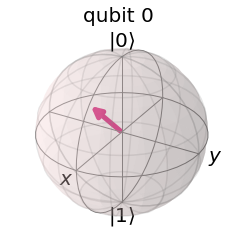

In [9]:
plot_bloch_multivector(to_qiskit_plot(IonTrap.R(np.pi/4, np.pi/2) * ket0))

## Rz and R identity

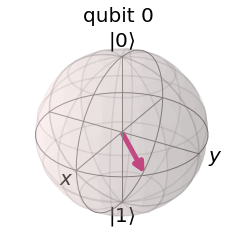

In [10]:
# Rz is special case, can't be realized by normal pulsing scheme
# Rz(theta) = Ry(-v*pi/2)*Rx(v*theta)*Ry(v*pi/2) = R(-v*pi/2,pi/2) * R(v*pi/2, pi/2)
plot_bloch_multivector(to_qiskit_plot(Rz(np.pi/4) * ketplus))

In [11]:
def Rz_equiv(v, theta):
    if(v != -1 and v != 1):
        print("sign for first/last Ry rotation is out of bounds!")
        return
    else:
        return Ry(-v*np.pi/2)*Rx(v*theta)*Ry(v*np.pi/2)

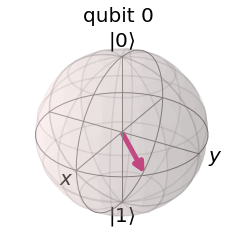

In [12]:
plot_bloch_multivector(to_qiskit_plot(Rz_equiv(1, np.pi/4) * ketplus))

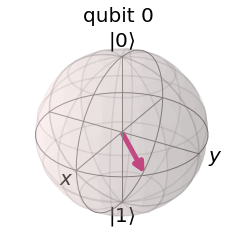

In [13]:
# Try a negative rotation 
plot_bloch_multivector(to_qiskit_plot(Rz_equiv(-1, np.pi/4) * ketplus))

In [17]:
## Implement the XX Gate
def XX(phi):
    return np.matrix([[np.cos(phi), 0, 0, -1j*np.sin(phi)],
                      [0, np.cos(phi),  -1j*np.sin(phi), 0],
                      [0, -1j*np.sin(phi), np.cos(phi),  0],
                      [-1j*np.sin(phi), 0, 0, np.cos(phi)]])

In [39]:
## CNOT 
### Created in Cirq-Like fashion, groups of gates are treated as moments
### |CT> arrangement, C is the control, T is the target

# moments
m1 = np.kron(Ry(np.pi/2), np.eye(2))
m2 = XX(-np.pi/4)
m3 = np.kron(Rx(np.pi/2), Rx(np.pi/2))
m4 = np.kron(Ry(np.pi/2), np.eye(2))

m1 * m2 * m3 * m4 * ket10

matrix([[-1.57009246e-16-1.57009246e-16j],
        [-7.07106781e-01+7.07106781e-01j],
        [ 5.55111512e-17-5.55111512e-17j],
        [ 7.85046229e-17-7.85046229e-17j]])

In [ ]:
## Single step through each moment

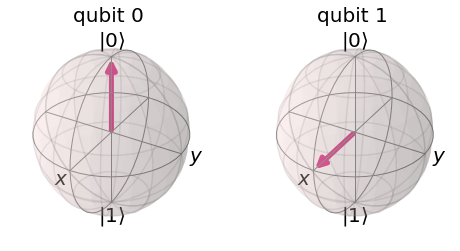

In [27]:
plot_bloch_multivector(to_qiskit_plot(m1*ket10))

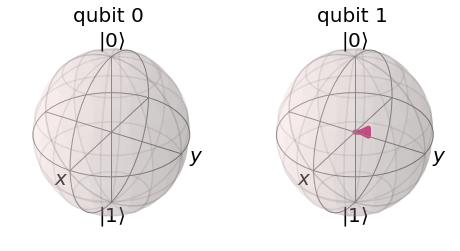

In [29]:
plot_bloch_multivector(to_qiskit_plot(m1 * m2 * ket10))
## something wrong with XX?

In [38]:
XX(np.pi/8) * XX(np.pi/8).H # Is unitary

matrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [41]:
### Qiskit's support for Ion Trapping

In [68]:
from qiskit import *
from qiskit import Aer
from math import pi
from qiskit.visualization import plot_bloch_multivector

In [75]:
qc = QuantumCircuit(2)
qc.rxx(pi, 0, 1)

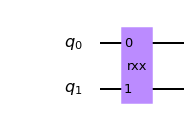

In [76]:
qc.draw(output='mpl')

In [77]:
statevec_sim = Aer.get_backend('statevector_simulator')

In [78]:
final_state = execute(qc,statevec_sim).result().get_statevector()

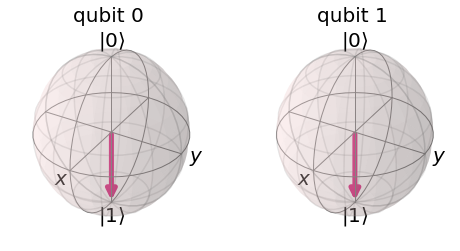

In [79]:
plot_bloch_multivector(final_state)